# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Lai-&amp;-Robbins-lower-bound-for-stochastic-bandit-with-full-restart-points" data-toc-modified-id="Lai-&amp;-Robbins-lower-bound-for-stochastic-bandit-with-full-restart-points-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lai &amp; Robbins lower-bound for stochastic bandit with full restart points</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Some-MAB-problem-with-Bernoulli-arms" data-toc-modified-id="Some-MAB-problem-with-Bernoulli-arms-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Some MAB problem with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Some-RL-algorithms" data-toc-modified-id="Some-RL-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some RL algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-Evaluator-object" data-toc-modified-id="Creating-the-Evaluator-object-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>Evaluator</code> object</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev2 toc-item"><a href="#Visualisation-the-lower-bound-for-algorithms-that-restart-at-breaking-points" data-toc-modified-id="Visualisation-the-lower-bound-for-algorithms-that-restart-at-breaking-points-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualisation the lower-bound for algorithms that restart at breaking points</a></div><div class="lev2 toc-item"><a href="#Seeing-the-lower-bound-on-the-regret-plot" data-toc-modified-id="Seeing-the-lower-bound-on-the-regret-plot-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Seeing the lower-bound on the regret plot</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></div>

---
# Lai & Robbins lower-bound for stochastic bandit with full restart points

First, be sure to be in the main folder, or to have installed [`SMPyBandits`](https://github.com/SMPyBandits/SMPyBandits), and import `Evaluator` from `Environment` package:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install SMPyBandits watermark
%load_ext watermark
%watermark -v -m -p SMPyBandits -a "Lilian Besson"

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
Lilian Besson 

CPython 3.6.6
IPython 7.1.1

SMPyBandits 0.9.4

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [3]:
# Local imports
from SMPyBandits.Environment import Evaluator, tqdm
from SMPyBandits.Environment.plotsettings import legend, makemarkers

We also need arms, for instance `Bernoulli`-distributed arm:

In [4]:
# Import arms
from SMPyBandits.Arms import Bernoulli

And finally we need some single-player Reinforcement Learning algorithms:

In [7]:
# Import algorithms
from SMPyBandits.Policies import *

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.4, 7)

---
## Creating the problem

### Parameters for the simulation
- $T = 20000$ is the time horizon,
- $N = 40$ is the number of repetitions,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [9]:
HORIZON = 20000
REPETITIONS = 40
N_JOBS = 4

### Some MAB problem with Bernoulli arms
We consider in this example $3$ problems, with `Bernoulli` arms, of different means.

In [10]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # A very easy problem, but it is used in a lot of articles
            "arm_type": Bernoulli,
            "params": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        }
    ]

### Some RL algorithms
We compare some policies that use the [`DoublingTrickWrapper`](https://smpybandits.github.io/docs/Policies.DoublingTrickWrapper.html#module-Policies.DoublingTrickWrapper) policy, with a common growing scheme.

In [11]:
NEXT_HORIZONS = [
    # next_horizon__arithmetic,
    next_horizon__geometric,
    # next_horizon__exponential,
    # next_horizon__exponential_slow,
    next_horizon__exponential_generic
]

In [12]:
POLICIES = [
    # --- Doubling trick algorithm
    {
        "archtype": DoublingTrickWrapper,
        "params": {
            "next_horizon": next_horizon,
            "full_restart": full_restart,
            "policy": policy,
        }
    }
    for policy in [
        UCBH,
        MOSSH,
        klUCBPlusPlus,
        ApproximatedFHGittins,
    ]
    for full_restart in [
        True,
        # False,
    ]
    for next_horizon in NEXT_HORIZONS
]

Complete configuration for the problem:

In [13]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}
configuration

{'horizon': 20000,
 'repetitions': 40,
 'n_jobs': 4,
 'verbosity': 6,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
 'policies': [{'archtype': SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'next_horizon': CPUDispatcher(<function next_horizon__geometric at 0x7f18c1a70620>),
    'full_restart': True,
    'policy': SMPyBandits.Policies.UCBH.UCBH}},
  {'archtype': SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'next_horizon': <function SMPyBandits.Policies.DoublingTrickWrapper.next_horizon__exponential_generic(i, horizon)>,
    'full_restart': True,
    'policy': SMPyBandits.Policies.UCBH.UCBH}},
  {'archtype': SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'next_horizon': CPUDispatcher(<function next_horizon__geometric at 0x7f18c1a70620>),
    'full_restart': True,
    'policy': SMPyBandits.Policies.MOSSH.MOSSH}},

---
## Creating the `Evaluator` object

In [14]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 8
Time horizon: 20000
Number of repetitions: 40
Sampling rate for plotting, delta_t_plot: 50
Number of jobs for parallelization: 4
Using this dictionary to create a new environment:
 {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
 - with 'arms' = [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)]
 - with 'means' = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 ... 
 - a

##  Solving the problem
Now we can simulate all the $3$ environments. That part can take some time.

In [15]:
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)



Evaluating environment: MAB(nbArms: 9, arms: [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': CPUDispatcher(<function next_horizon__geometric at 0x7f18c1a70620>), 'full_restart': True, 'policy': <class 'SMPyBandits.Policies.UCBH.UCBH'>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': CPUDispatcher(<function next_horizon__geometric at 0x7f18c1a70620>), 'full_restart': True, 'policy': <class 'SMPyBandits.Policies.UCBH.UCBH'>}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': <function next_horizon__exponential_generic at 0x7f18c1a70ea0>, 'full_restart': True, 'policy': <class 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   23.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   23.1s finished





- Evaluating policy #2/8: DT($T_i = (200/2) 2^{2^i}$)[UCB-H($\alpha=4$)] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   21.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   21.6s finished





- Evaluating policy #3/8: DT($T_i = 200 \times 2^i$)[MOSS-H] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.3s finished





- Evaluating policy #4/8: DT($T_i = (200/2) 2^{2^i}$)[MOSS-H] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.0s finished





- Evaluating policy #5/8: DT($T_i = 200 \times 2^i$)[kl-UCB$^{++}$] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   35.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   35.7s finished





- Evaluating policy #6/8: DT($T_i = (200/2) 2^{2^i}$)[kl-UCB$^{++}$] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   33.1s finished





- Evaluating policy #7/8: DT($T_i = 200 \times 2^i$)[ApprFHG] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   25.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   25.4s finished





- Evaluating policy #8/8: DT($T_i = (200/2) 2^{2^i}$)[ApprFHG] ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   18.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   18.1s finished


## Plotting the results
And finally, visualize them, with the plotting method of a `Evaluator` object:

In [16]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    fig = evaluation.plotRegrets(envId)
    # evaluation.plotRegrets(envId, semilogx=True)
    # evaluation.plotRegrets(envId, meanRegret=True)
    # evaluation.plotBestArmPulls(envId)
    return fig


Final ranking for this environment #0 :
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[kl-UCB$^{++}$]'	was ranked	1 / 8 for this simulation (last regret = 144.11).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[MOSS-H]'	was ranked	2 / 8 for this simulation (last regret = 213.66).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[ApprFHG]'	was ranked	3 / 8 for this simulation (last regret = 239.97).
- Policy 'DT($T_i = 200 \times 2^i$)[kl-UCB$^{++}$]'	was ranked	4 / 8 for this simulation (last regret = 323.72).
- Policy 'DT($T_i = 200 \times 2^i$)[MOSS-H]'	was ranked	5 / 8 for this simulation (last regret = 500.27).
- Policy 'DT($T_i = 200 \times 2^i$)[ApprFHG]'	was ranked	6 / 8 for this simulation (last regret = 539.85).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[UCB-H($\alpha=4$)]'	was ranked	7 / 8 for this simulation (last regret = 636.46).
- Policy 'DT($T_i = 200 \times 2^i$)[UCB-H($\alpha=4$)]'	was ranked	8 / 8 for this simulation (last regret = 1363.4).

This MAB problem has: 
 - a [Lai & Robbins] complexity const

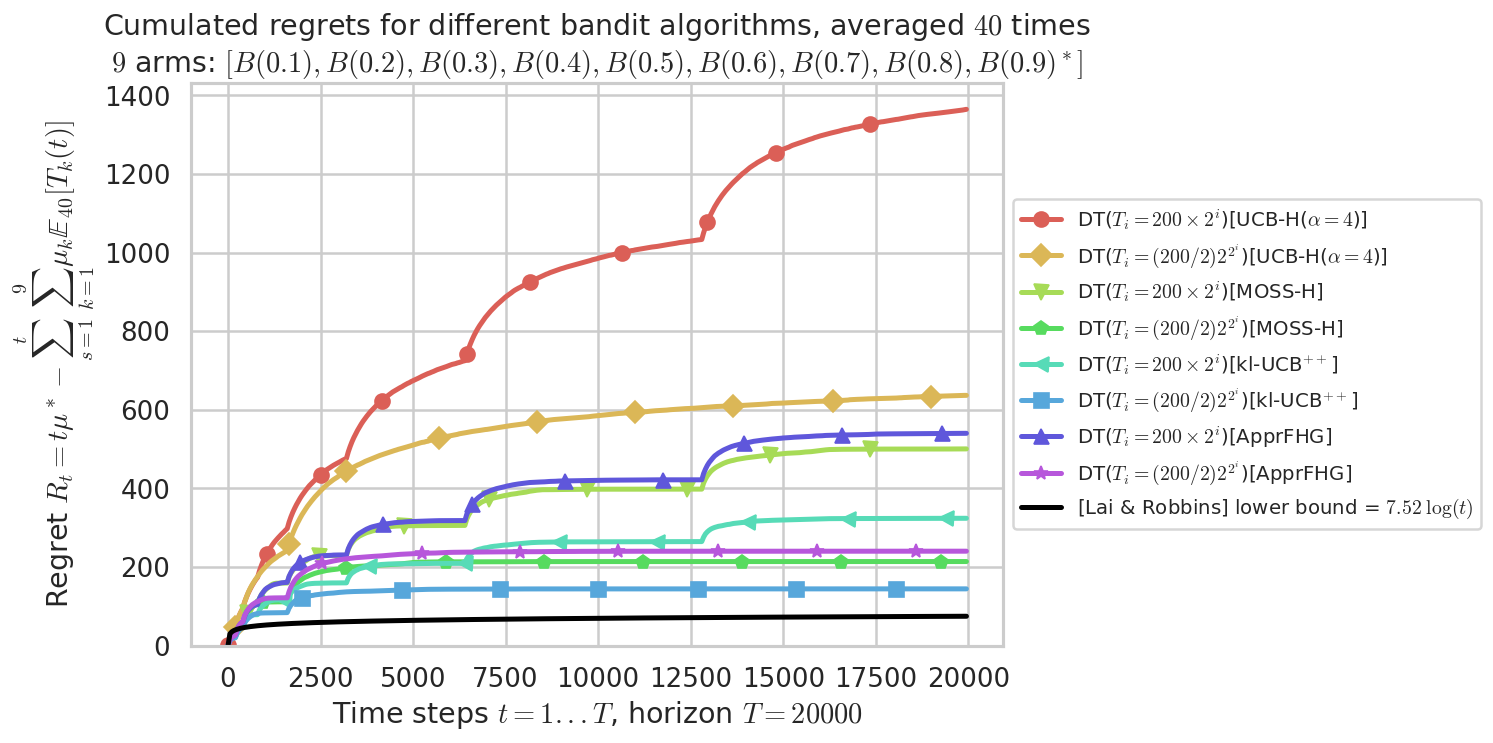

In [17]:
fig = plotAll(evaluation, 0)

## Visualisation the lower-bound for algorithms that restart at breaking points

In [18]:
DEFAULT_FIRST_HORIZON = 100

def lower_bound_with_breakpoints(next_horizon, horizon, env,
                                 first_horizon=DEFAULT_FIRST_HORIZON,
                                 fig=None, marker=None):
    points, gap = breakpoints(next_horizon, first_horizon, horizon)
    X = np.arange(1, horizon)
    Y = np.log(X)
    # Durty estimate
    for estimate_horizon in points:
        if estimate_horizon <= horizon:
            before_breakpoint = np.max(np.where(X == estimate_horizon - 1)[0])
            lower_bound_before_breakpoint = Y[before_breakpoint]
            print("At time {}, lowerbound was {}".format(estimate_horizon, lower_bound_before_breakpoint))
            after = np.where(X >= estimate_horizon)
            Y[after] = np.log(X[after] - X[before_breakpoint]) + lower_bound_before_breakpoint
    if fig is None:  # new figure if needed
        fig, ax = plt.subplots()
        ax.set_xlabel("Time steps t=1..T, $T = {}$".format(horizon))
        ax.set_ylabel("Regret lower-bound")
        ax.set_title("Lai & Robbins lower-bound for problem with $K={}$ arms and $C_K={:.3g}$\nAnd doubling trick with restart points ({})".format(env.nbArms, env.lowerbound(), next_horizon.__latex_name__))
    else:
        ax = fig.axes[0]
        # https://stackoverflow.com/a/26845924/
        ax_legend = ax.legend()
        ax_legend.remove()
    complexity = env.lowerbound()
    ax.plot(X, complexity * Y,
            'k--' if marker is None else '{}k--'.format(marker),
            markevery=(0.0, 0.1),
            label="LB, DT restart ({})".format(next_horizon.__latex_name__))
    legend(fig=fig)
    fig.show()
    return fig

At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 400, lowerbound was 14.498607402670718
At time 1600, lowerbound was 21.58868423844681


/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/src/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/matplotlib/legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '
/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/src/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


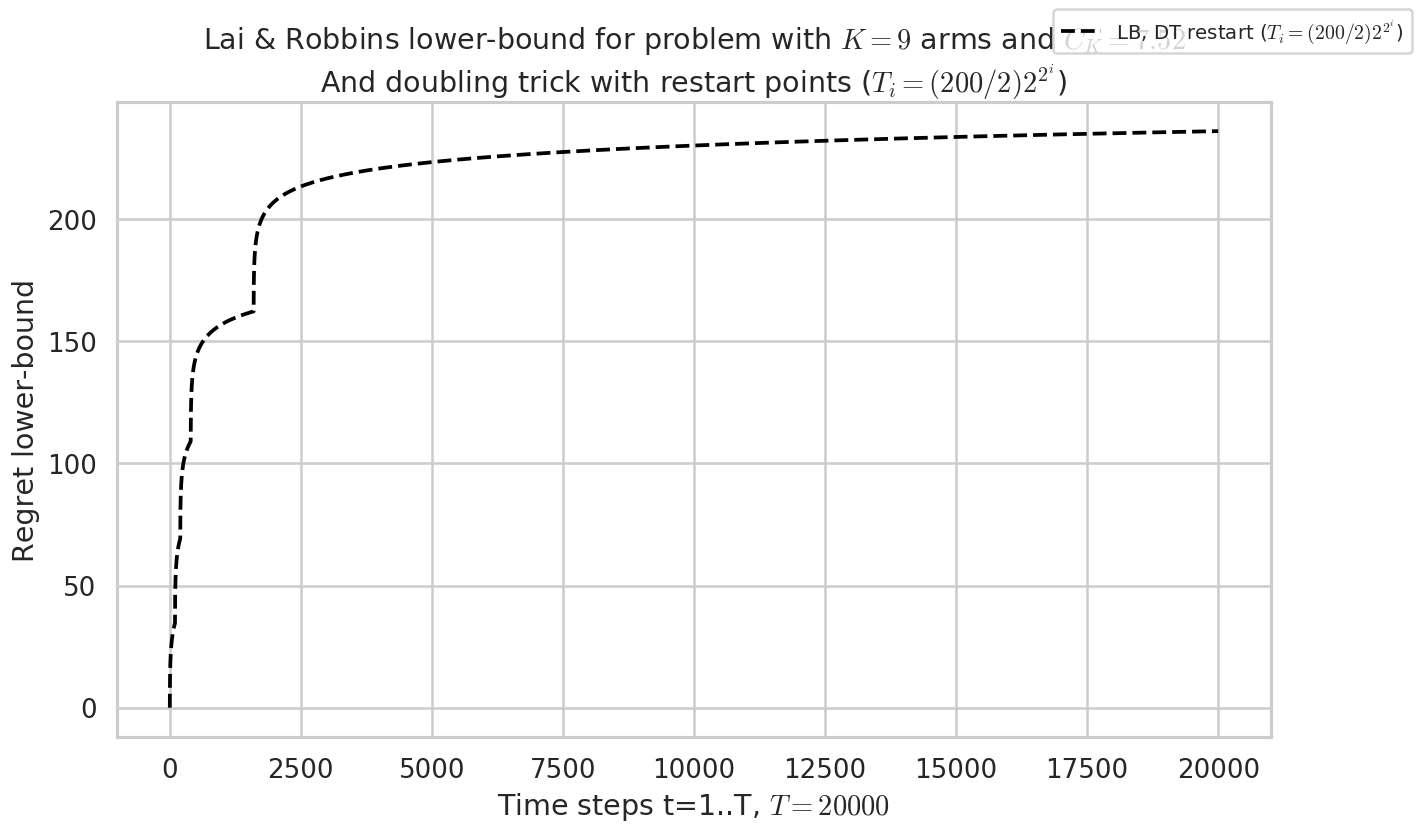

In [19]:
_ = lower_bound_with_breakpoints(next_horizon__exponential_generic, HORIZON, evaluation.envs[0])

## Seeing the lower-bound on the regret plot


Final ranking for this environment #0 :
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[kl-UCB$^{++}$]'	was ranked	1 / 8 for this simulation (last regret = 144.11).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[MOSS-H]'	was ranked	2 / 8 for this simulation (last regret = 213.66).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[ApprFHG]'	was ranked	3 / 8 for this simulation (last regret = 239.97).
- Policy 'DT($T_i = 200 \times 2^i$)[kl-UCB$^{++}$]'	was ranked	4 / 8 for this simulation (last regret = 323.72).
- Policy 'DT($T_i = 200 \times 2^i$)[MOSS-H]'	was ranked	5 / 8 for this simulation (last regret = 500.27).
- Policy 'DT($T_i = 200 \times 2^i$)[ApprFHG]'	was ranked	6 / 8 for this simulation (last regret = 539.85).
- Policy 'DT($T_i = (200/2) 2^{2^i}$)[UCB-H($\alpha=4$)]'	was ranked	7 / 8 for this simulation (last regret = 636.46).
- Policy 'DT($T_i = 200 \times 2^i$)[UCB-H($\alpha=4$)]'	was ranked	8 / 8 for this simulation (last regret = 1363.4).

This MAB problem has: 
 - a [Lai & Robbins] complexity const

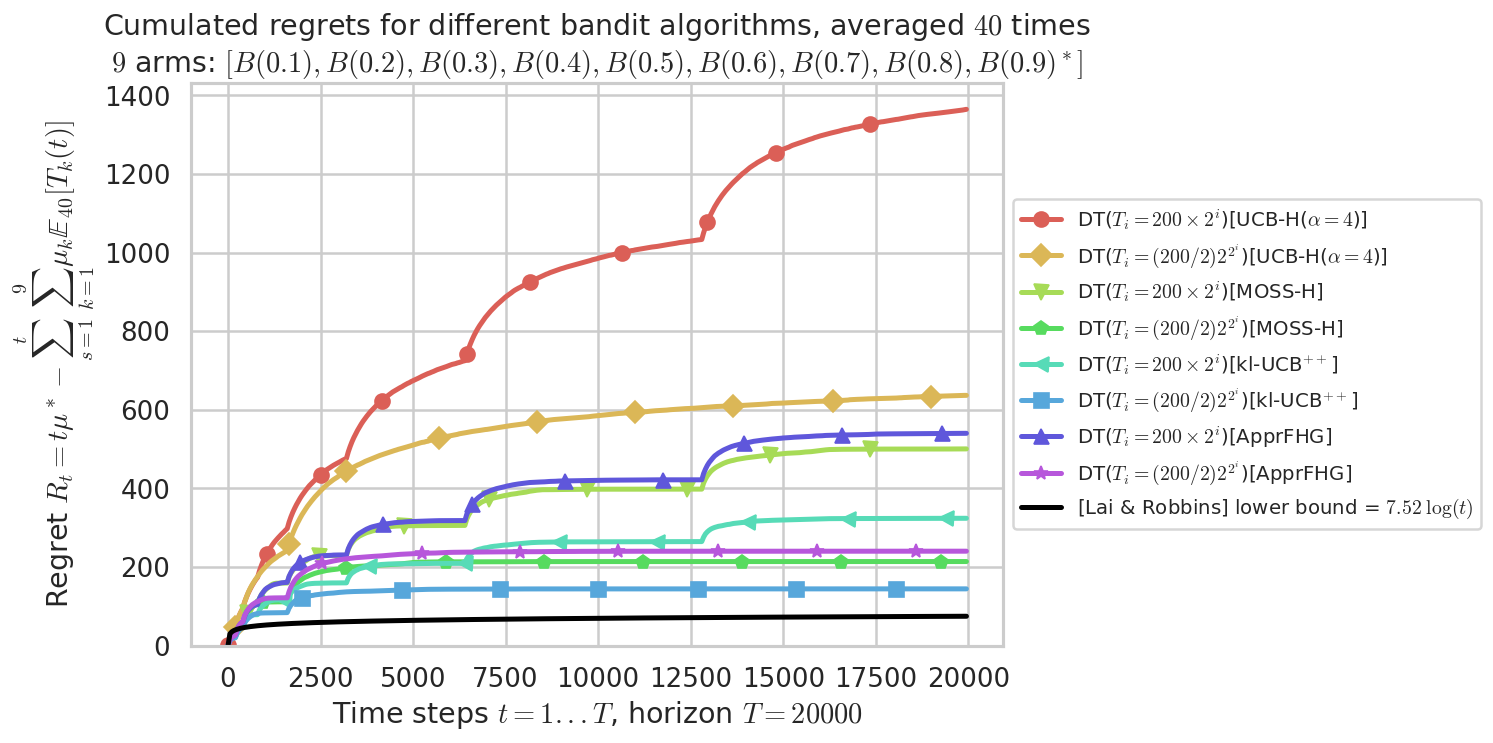

In [20]:
fig = plotAll(evaluation, 0)

In [21]:
markers = makemarkers(len(NEXT_HORIZONS))

At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 400, lowerbound was 14.498607402670718
At time 800, lowerbound was 20.4900719497787
At time 1600, lowerbound was 27.174683677446627
At time 3200, lowerbound was 34.5524425856745
At time 6400, lowerbound was 42.62334867446232
At time 12800, lowerbound was 51.38740194381008
At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 400, lowerbound was 14.498607402670718
At time 1600, lowerbound was 21.58868423844681


/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/src/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/matplotlib/legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '
/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/src/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


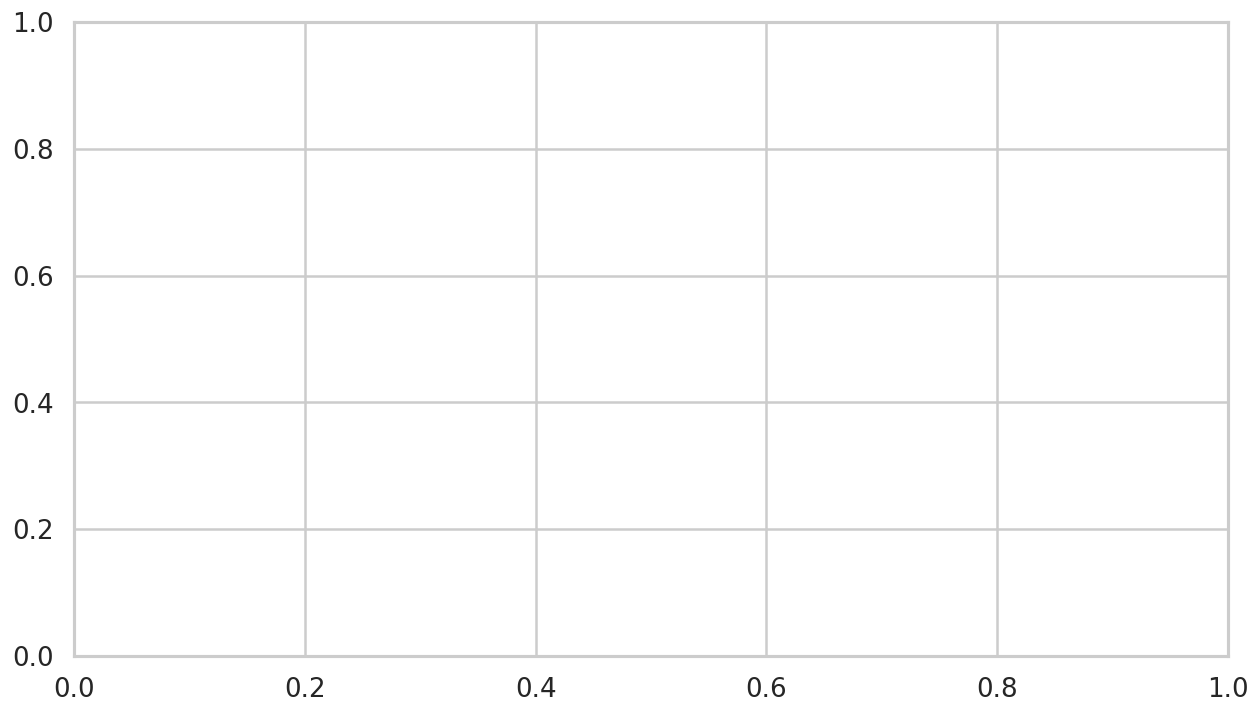

In [22]:
for i, next_horizon in enumerate(NEXT_HORIZONS):
    fig = lower_bound_with_breakpoints(next_horizon, HORIZON, evaluation.envs[0], fig=fig, marker=markers[i])

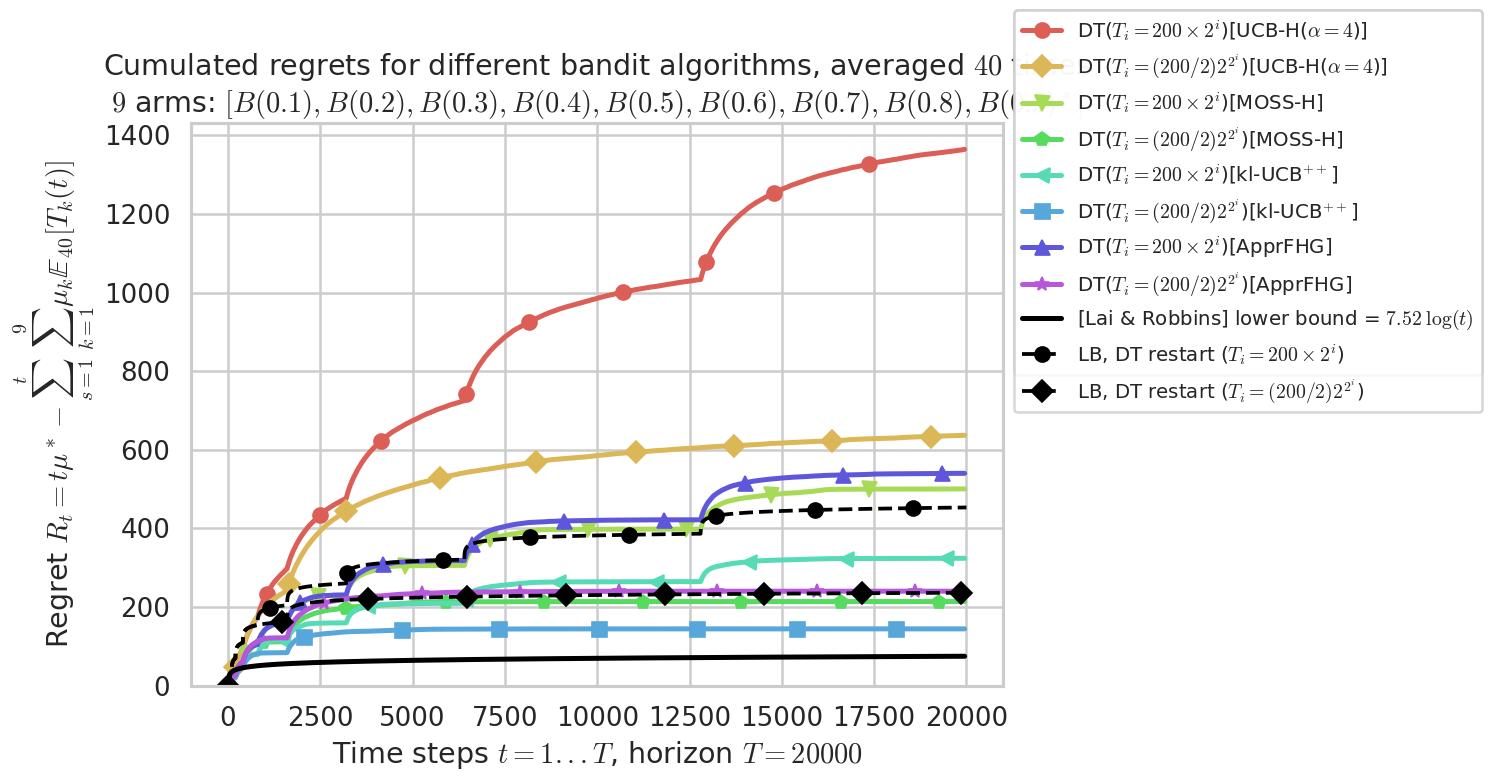

In [23]:
fig

## Conclusion

That's it for today, folks!